In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [22]:
np.random.seed(0)  # Per riproducibilità
n_samples = 50
prezzi = np.random.uniform(5, 50, n_samples) 
promo = np.random.randint(5, 25, n_samples)  
vendite = 100 - 1 * prezzi + 3 * promo + np.random.normal(0, 10, n_samples)  
# Creazione del DataFrame
df = pd.DataFrame({
    'Prezzo': prezzi,
    'Promo':promo,
    'Vendite': vendite
})

x = np.asarray(df[['Prezzo', 'Promo']])
y = np.asarray(df['Vendite'])
regr = LinearRegression()
regr.fit(x, y)
predicted_Sales = regr.predict([[79, 400]])
y_pred=regr.predict(x)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)



Intercept: 
 101.70459670558137
Coefficients: 
 [-0.96944177  2.7147066 ]


In [21]:
x = sm.add_constant(x) # adding a constant
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     98.88
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           1.44e-17
Time:                        12:01:53   Log-Likelihood:                -189.77
No. Observations:                  50   AIC:                             385.5
Df Residuals:                      47   BIC:                             391.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.7046      6.267     16.229      0.0

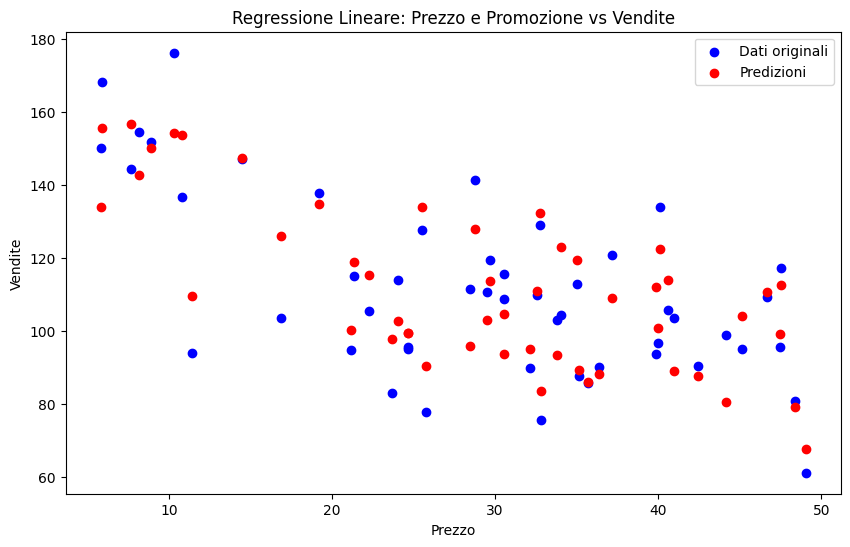

In [26]:
# Creazione del plot
plt.figure(figsize=(10, 6))

# Plot dei dati originali
plt.scatter(df['Prezzo'], y, color='blue', label='Dati originali')

# Plot delle predizioni
plt.scatter(df['Prezzo'], y_pred, color='red', label='Predizioni')

plt.xlabel('Prezzo')
plt.ylabel('Vendite')
plt.title('Regressione Lineare: Prezzo e Promozione vs Vendite')
plt.legend()
plt.show()